# Aufgabe -6

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## a)

In [33]:
# Zwei Sequenzen mit gleichem Seed
def generate_uniform_sequence(seed, size=10000):
    np.random.seed(seed)
    return np.random.uniform(0, 1, size)

In [34]:
seed = 42
sequence1 = generate_uniform_sequence(seed)
sequence2 = generate_uniform_sequence(seed)
print("Erste 5 Werte mit gleichem Seed:")
print("Sequenz 1:", sequence1[:5])
print("Sequenz 2:", sequence2[:5])

Erste 5 Werte mit gleichem Seed:
Sequenz 1: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
Sequenz 2: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


## b)

In [35]:
# Zwei Sequenzen mit unterschiedlichen Seeds
seed1 = 42
seed2 = 99
sequence3 = generate_uniform_sequence(seed1)
sequence4 = generate_uniform_sequence(seed2)
print("\nErste 5 Werte mit unterschiedlichen Seeds:")
print("Sequenz 3 (Seed 42):", sequence3[:5])
print("Sequenz 4 (Seed 99):", sequence4[:5])


Erste 5 Werte mit unterschiedlichen Seeds:
Sequenz 3 (Seed 42): [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
Sequenz 4 (Seed 99): [0.67227856 0.4880784  0.82549517 0.03144639 0.80804996]


## c)


Statistiken für Sequenz 1:


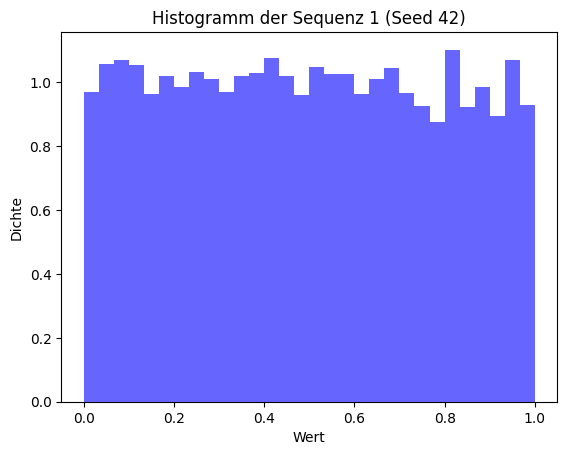

Empirischer Mittelwert: 0.49415955768429964, Theoretischer Mittelwert: 0.5
Empirische Varianz: 0.08272281657696529, Theoretische Varianz: 0.08333333333333333

Statistiken für Sequenz 4:


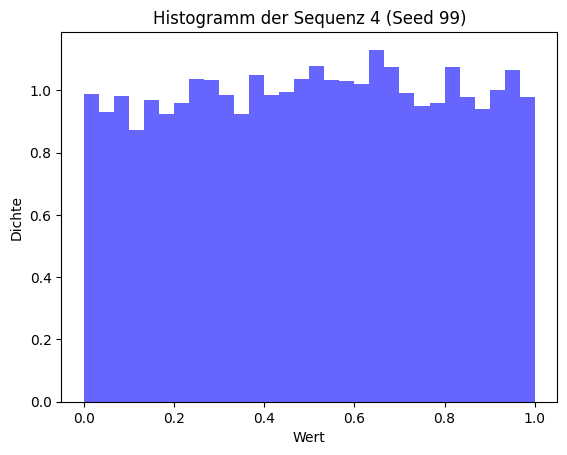

Empirischer Mittelwert: 0.505435789189812, Theoretischer Mittelwert: 0.5
Empirische Varianz: 0.08181482579739101, Theoretische Varianz: 0.08333333333333333


In [36]:
# Histogramm, Mittelwert und Varianz
def plot_histogram_and_stats(sequence, title):
    plt.hist(sequence, bins=30, density=True, alpha=0.6, color='b')
    plt.title(title)
    plt.xlabel('Wert')
    plt.ylabel('Dichte')
    plt.show()
    empirical_mean = np.mean(sequence)
    empirical_var = np.var(sequence)
    theoretical_mean = 0.5
    theoretical_var = 1/12
    print(f'Empirischer Mittelwert: {empirical_mean}, Theoretischer Mittelwert: {theoretical_mean}')
    print(f'Empirische Varianz: {empirical_var}, Theoretische Varianz: {theoretical_var}')

print("\nStatistiken für Sequenz 1:")
plot_histogram_and_stats(sequence1, 'Histogramm der Sequenz 1 (Seed 42)')
print("\nStatistiken für Sequenz 4:")
plot_histogram_and_stats(sequence4, 'Histogramm der Sequenz 4 (Seed 99)') 

# Intermezzo

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson, norm, expon
from scipy.stats import gamma, beta


In [38]:

rng = np.random.default_rng(np.random.PCG64(42))
N = 50_000


In [39]:
# --- Diskret ---
# Bernoulli(p=0.3): E=p, Var=p(1-p)
p = 0.3
x = bernoulli.rvs(p, size=N, random_state=rng)
print("Bernoulli")
print("Simulation: mean/var ~", x.mean(), x.var(ddof=1))
print("Theorie:              ", p, p*(1-p))
print("")

# Binomial(n=10,p=0.4): E=np, Var=np(1-p)
n, pb = 10, 0.4
x = binom.rvs(n, pb, size=N, random_state=rng)
print("Binomial")
print("Simulation:  mean/var ~", x.mean(), x.var(ddof=1))
print("Theorie:               ",  n*pb, n*pb*(1-pb))
print("")


# Poisson(lam=3): E=Var=lam
lam = 3
x = poisson.rvs(lam, size=N, random_state=rng)
print("Poisson")
print("Simulation:   mean/var ~", x.mean(), x.var(ddof=1))
print("Theorie:                ", lam, lam)
print("")



Bernoulli
Simulation: mean/var ~ 0.30226 0.21090311046220925
Theorie:               0.3 0.21

Binomial
Simulation:  mean/var ~ 4.0008 2.4050074601492026
Theorie:                4.0 2.4

Poisson
Simulation:   mean/var ~ 2.9935 2.9969976899537993
Theorie:                 3 3



In [40]:
# --- Stetig ---
# Normal(0,1): E=0, Var=1
z = rng.standard_normal(N)
print("Standardnormal")
print("Simulation:    mean/var ~", z.mean(), z.var(ddof=1))
print("Theorie:                 ", 0, 1)
print("")

# Exponential(lam=1): E=1, Var=1
e = expon.rvs(scale=1.0, size=N, random_state=rng)
print("Exponential")
print("Simulation:     mean/var ~", e.mean(), e.var(ddof=1))
print("Theorie:                  ", 1, 1)
print("")

# Gamma(k=3, theta=2): E=k*theta, Var=k*theta^2
g = gamma.rvs(a=3, scale=2.0, size=N, random_state=rng)
print("Gamma")
print("Simulation:     mean/var ~", g.mean(), g.var(ddof=1))
print("Theorie:                  ",  3*2, 3*(2**2))
print("")

# Beta(2,5): E=2/7, Var=alpha*beta/[(alpha+beta)^2*(alpha+beta+1)]
b = beta.rvs(a=2, b=5, size=N, random_state=rng)
theo_mean = 2/7
theo_var  = 2*5/((7**2)*8)
print("Beta")
print("Simulation:      mean/var ~", b.mean(), b.var(ddof=1))
print("Theorie:                   ", theo_mean, theo_var)
print("")


Standardnormal
Simulation:    mean/var ~ 0.0005407840698049242 0.9951361451429697
Theorie:                  0 1

Exponential
Simulation:     mean/var ~ 0.9999492596845585 0.9886384030017975
Theorie:                   1 1

Gamma
Simulation:     mean/var ~ 6.003954276045761 11.961161057982842
Theorie:                   6 12

Beta
Simulation:      mean/var ~ 0.28537483913912653 0.02561083810047625
Theorie:                    0.2857142857142857 0.025510204081632654



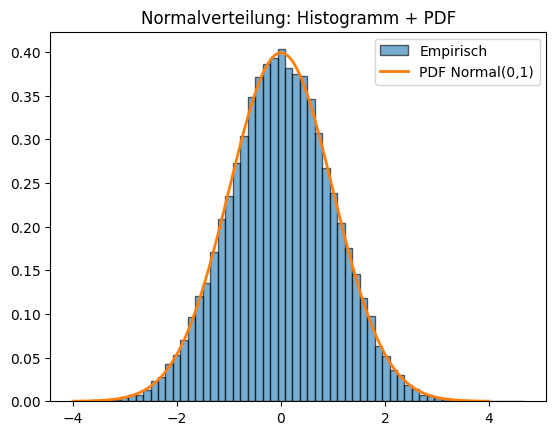

In [41]:
# --- Beispielplot: Normal (PDF über Histogramm) ---
xs = np.linspace(-4, 4, 401)
plt.figure()
plt.hist(z, bins=60, density=True, alpha=0.6, 
    edgecolor="k", label="Empirisch")
plt.plot(xs, norm.pdf(xs, 0, 1), lw=2, label="PDF Normal(0,1)")
plt.title("Normalverteilung: Histogramm + PDF")
plt.legend()
plt.show()

# Aufgabe -5

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon


## a) 

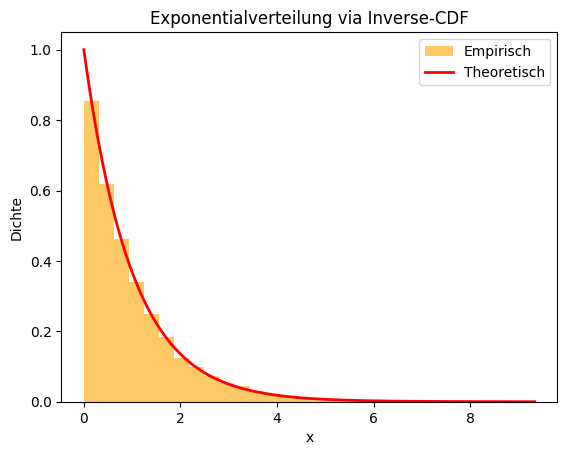

In [43]:
def inverse_cdf_exponential(lam, size=1000):
    U = np.random.uniform(0, 1, size)
    X = - (1 / lam) * np.log(1 - U)
    return X

# Parameter
lambda_param = 1.0
sample_size = 10000

# Generieren der Stichprobe
samples = inverse_cdf_exponential(lambda_param, sample_size)

# Validierung
plt.hist(samples, bins=30, density=True, alpha=0.6, color='orange', label='Empirisch')
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, expon.pdf(x, scale=1/lambda_param), 'r-', lw=2, label='Theoretisch')
plt.title('Exponentialverteilung via Inverse-CDF')
plt.xlabel('x')
plt.ylabel('Dichte')
plt.legend()
plt.show()


In [44]:
# Mittelwert und Varianz
empirical_mean = np.mean(samples)
empirical_var = np.var(samples)
theoretical_mean = 1 / lambda_param
theoretical_var = 1 / (lambda_param ** 2)
print(f'Empirischer Mittelwert: {empirical_mean}, Theoretischer Mittelwert: {theoretical_mean}')
print(f'Empirische Varianz: {empirical_var}, Theoretische Varianz: {theoretical_var}')


Empirischer Mittelwert: 1.0213093629027772, Theoretischer Mittelwert: 1.0
Empirische Varianz: 1.0822578553292743, Theoretische Varianz: 1.0


## b)

In [45]:
def inverse_cdf_discrete(categories, probabilities, size=1000):
    U = np.random.uniform(0, 1, size)
    cumulative_prob = np.cumsum(probabilities)
    samples = []
    for u in U:
        for i, cp in enumerate(cumulative_prob):
            if u < cp:
                samples.append(categories[i])
                break
    return samples


In [46]:
# Kategorien und Wahrscheinlichkeiten
categories = ['A', 'B', 'C', 'D']
probabilities = [0.1, 0.2, 0.3, 0.4]
# Generieren der Stichprobe
discrete_samples = inverse_cdf_discrete(categories, probabilities, sample_size)
# Validierung
counts = Counter(discrete_samples)
empirical_freq = {cat: counts[cat] / sample_size for cat in categories}
print('Empirische Häufigkeiten:', empirical_freq)
print('Theoretische Wahrscheinlichkeiten:', {cat: prob for cat, prob in zip(categories, probabilities)})  

Empirische Häufigkeiten: {'A': 0.1051, 'B': 0.1987, 'C': 0.2991, 'D': 0.3971}
Theoretische Wahrscheinlichkeiten: {'A': 0.1, 'B': 0.2, 'C': 0.3, 'D': 0.4}


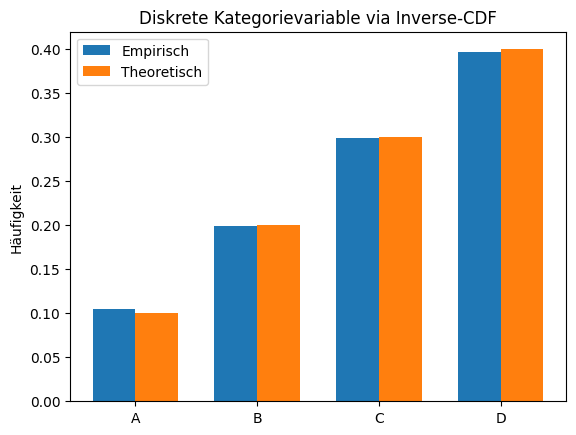

In [47]:
# Balkendiagramm (gruppiert)
x = np.arange(len(categories))
width = 0.35
empirical_values = [empirical_freq[cat] for cat in categories]
theoretical_values = probabilities
plt.bar(x - width/2, empirical_values, width, label='Empirisch')
plt.bar(x + width/2, theoretical_values, width, label='Theoretisch')
plt.xticks(x, categories)
plt.legend()
plt.ylabel('Häufigkeit')
plt.title('Diskrete Kategorievariable via Inverse-CDF')
plt.show()

# Aufgabe -4

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## a)

In [49]:
# Funktion zum Ziehen aus einer kategorialen Verteilung
def sample_categorical(labels, probs, size=1000):
    U = np.random.uniform(0, 1, size)
    cumulative_prob = np.cumsum(probs)
    samples = []
    for u in U:
        for i, cp in enumerate(cumulative_prob):
            if u < cp:
                samples.append(labels[i])
                break
    return samples

In [50]:
# Validierung
labels = ['A', 'B', 'C', 'D']
probs = [0.1, 0.2, 0.3, 0.4]
sample_size = 100000
samples = sample_categorical(labels, probs, sample_size)
counts = Counter(samples)
empirical_freq = {label: counts[label] / sample_size for label in labels}
print('Empirische Häufigkeiten:', empirical_freq)
print('Theoretische Wahrscheinlichkeiten:', {label: prob for label, prob in zip(labels, probs)})

Empirische Häufigkeiten: {'A': 0.09986, 'B': 0.20067, 'C': 0.29992, 'D': 0.39955}
Theoretische Wahrscheinlichkeiten: {'A': 0.1, 'B': 0.2, 'C': 0.3, 'D': 0.4}


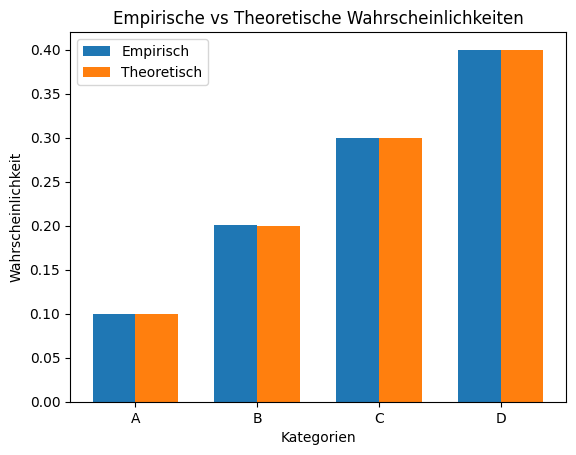

In [51]:
# Balkendiagramm
x = np.arange(len(labels))
width = 0.35
empirical_values = [empirical_freq[label] for label in labels]
theoretical_values = probs
plt.bar(x - width/2, empirical_values, width, label='Empirisch')
plt.bar(x + width/2, theoretical_values, width, label='Theoretisch')
plt.xticks(x, labels)
plt.xlabel('Kategorien')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Empirische vs Theoretische Wahrscheinlichkeiten')
plt.legend()
plt.show()

## b)

In [52]:
# Laden einer Seite mit p ∝ (1,1,1,1,3)
labels_dice = [1, 2, 3, 4, 5, 6]
probs_dice = [1, 1, 1, 1, 1, 3]
probs_dice = np.array(probs_dice) / sum(probs_dice)
# Ziehen von 100000 Seiten
dice_samples = sample_categorical(labels_dice, probs_dice, sample_size)


In [53]:

# Empirische Erwartung
empirical_mean_dice = np.mean(dice_samples)
# Theoretische Erwartung
theoretical_mean_dice = sum(label * prob for label, prob in zip(labels_dice, probs_dice))
print(f'Empirischer Erwartungswert der Seite: {empirical_mean_dice}')
print(f'Theoretischer Erwartungswert der Seite: {theoretical_mean_dice}')

Empirischer Erwartungswert der Seite: 4.12055
Theoretischer Erwartungswert der Seite: 4.125


# Aufgabe -3

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [55]:
# Parameter
n = 100  # Anzahl der Kartentypen
b = 10   # Karten pro Booster
N = 100000  # Anzahl der Booster
rng = np.random.default_rng(seed=42)  # Zufallszahlengenerator mit Seed

## a)

In [56]:
# Funktion zum Öffnen eines Boosters mit Zurücklegen
def open_booster_uniform(n, b, rng):
    return rng.integers(1, n + 1, size=b).tolist()

## c)

In [57]:
# Simulieren von Boostern mit Zurücklegen
all_boosters_uniform = [open_booster_uniform(n, b, rng) for _ in range(N)]
# Flatten der Liste und Zählen der Kartentypen
flat_uniform = [card for booster in all_boosters_uniform for card in booster]
counts_uniform = Counter(flat_uniform)
empirical_freq_uniform = {card: counts_uniform[card] / (N * b) for card in range(1, n + 1)}

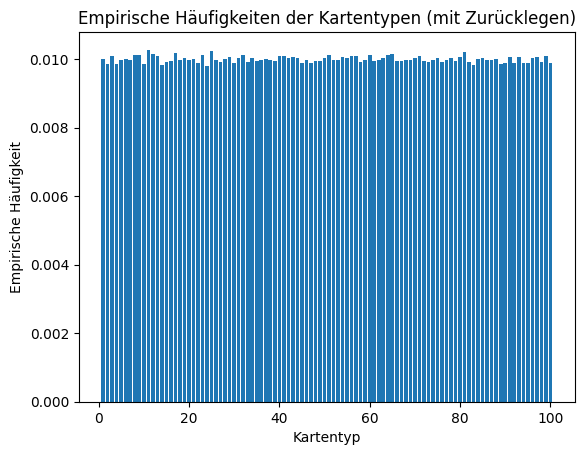

In [58]:
# Histogramm für Boosters mit Zurücklegen
plt.bar(empirical_freq_uniform.keys(), empirical_freq_uniform.values())
plt.xlabel('Kartentyp')
plt.ylabel('Empirische Häufigkeit')
plt.title('Empirische Häufigkeiten der Kartentypen (mit Zurücklegen)')
plt.show()


## b)

## Erweiterung (optional)

In [59]:
# Funktion zum Öffnen eines Boosters ohne Zurücklegen
def open_booster_without_replacement(n, b, rng):
    return rng.choice(np.arange(1, n + 1), size=b, replace=False).tolist()

In [60]:
# Simulieren von Boostern ohne Zurücklegen
all_boosters_without_replacement = [open_booster_without_replacement(n, b, rng) for _ in range(N)]
# Flatten der Liste und Zählen der Kartentypen
flat_without_replacement = [card for booster in all_boosters_without_replacement for card in booster]
counts_without_replacement = Counter(flat_without_replacement)
empirical_freq_without_replacement = {card: counts_without_replacement[card] / (N * b) for card in range(1, n + 1)}

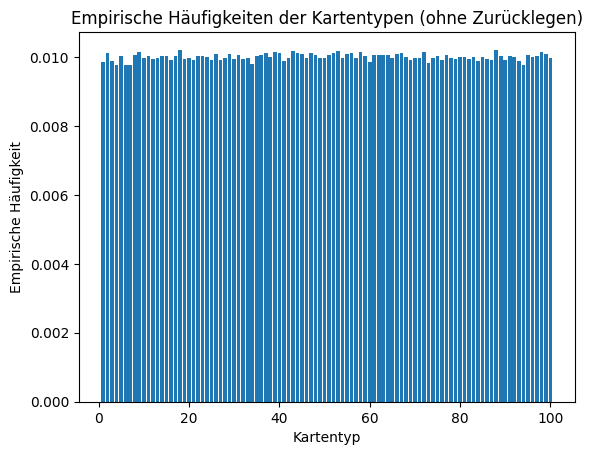

In [61]:

# Histogramm für Boosters ohne Zurücklegen
plt.bar(empirical_freq_without_replacement.keys(), empirical_freq_without_replacement.values())
plt.xlabel('Kartentyp')
plt.ylabel('Empirische Häufigkeit')
plt.title('Empirische Häufigkeiten der Kartentypen (ohne Zurücklegen)')
plt.show()    

# Aufgabe -2

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [63]:
# Parameter
n = 100  # Anzahl der Kartentypen
b = 10   # Karten pro Booster
N = 100000  # Anzahl der Booster

# Raritäten und ihre Anteile
cards = list(range(1, n + 1))
rarity_probs = [78/n, 20/n, 2/n] 
rarities = ["C", "U", "R"]
rng = np.random.default_rng(seed=42)  # Zufallszahlengenerator mit Seed

## a)

In [64]:
# Funktion zum Öffnen eines Boosters mit gewichteten Kategorien
def open_booster_weighted(cards, rarities, rarity_probs, b, rng):
    booster_ids = rng.choice(cards, size=b, replace=False).tolist()
    
    cumulative_prob = np.cumsum(rarity_probs)
    samples = []
    for j in range(b):
        u = rng.uniform(0, 1)
        for i, cp in enumerate(cumulative_prob):
            if u < cp:
                samples.append(
                    (booster_ids[j], rarities[i])
                    )
                break
    return samples

## b)

In [65]:
# Simulieren von Boostern mit gewichteten Kategorien
all_boosters_weighted = [open_booster_weighted(cards, rarities, rarity_probs, b, rng) for _ in range(N)]

# Zählen der Raritäten pro Booster
all_boosters_rarity_counters = [Counter([card[1] for card in booster]) for booster in all_boosters_weighted]

# Flattening, nur die Rare Karten
all_boosters_rare_cards = [Counter.get("R", 0) for Counter in all_boosters_rarity_counters]

# Zählen der Raritäten pro Booster
rarity_counts = Counter(all_boosters_rare_cards) 

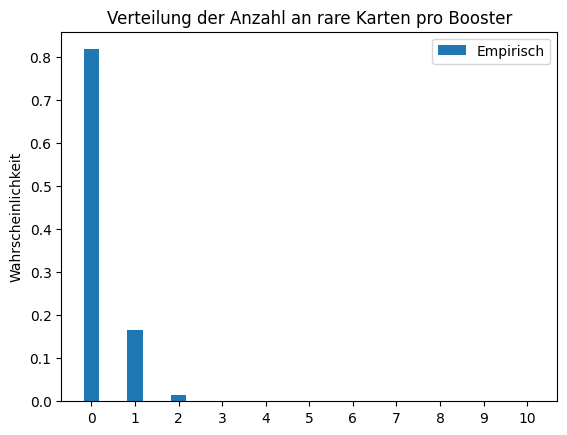

In [66]:
# Balkendiagramm der Raritätenverteilung von 1 bis 10 (auch wenn der Counter nicht alle Zahlen hat)
empirical_values = [rarity_counts.get(i, 0) / N for i in range(0, b + 1)]

x = list(range(0, b + 1))
plt.bar(x, empirical_values, width, label='Empirisch')
plt.xticks(x, x)
plt.title('Verteilung der Anzahl an rare Karten pro Booster')
plt.ylabel('Wahrscheinlichkeit')
plt.legend()
plt.show()

In [67]:
# Mittelwert der Häufigkeit an rare Karten pro Booster
empirical_mean_rare = np.mean(all_boosters_rare_cards)
theoretical_mean_rare = b * rarity_probs[2]
print(f'Empirischer Mittelwert an rare Karten pro Booster: {empirical_mean_rare}')
print(f'Theoretischer Mittelwert an rare Karten pro Booster: {theoretical_mean_rare}')

Empirischer Mittelwert an rare Karten pro Booster: 0.20019
Theoretischer Mittelwert an rare Karten pro Booster: 0.2


## Erweiterung (optional)

# Aufgabe -1

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


## a)

In [69]:
# 1. Doppelte pro Booster
duplicate_counts = []
# aus Aufgabe -3 c)
for booster in all_boosters_uniform:
    counts = Counter(booster)
    # Nur das zweite Auftreten zählt als Duplikat
    duplicates = sum(count - 1 for count in counts.values() if count > 1)

    duplicate_counts.append(duplicates)

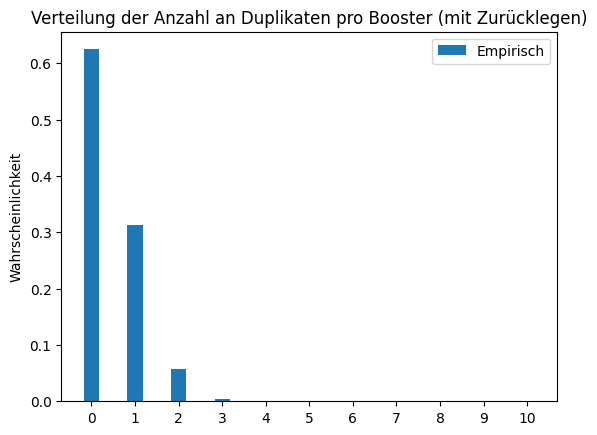

In [70]:
duplicate_counter = Counter(duplicate_counts)
empirical_duplicate_values = [duplicate_counter.get(i, 0) / N for i in range(0, b + 1)]
x_duplicates = list(range(0, b + 1))
plt.bar(x_duplicates, empirical_duplicate_values, width, label='Empirisch')
plt.xticks(x_duplicates, x_duplicates)
plt.title('Verteilung der Anzahl an Duplikaten pro Booster (mit Zurücklegen)')
plt.ylabel('Wahrscheinlichkeit')
plt.legend()
plt.show()

## b)

In [71]:
new_rarity_probs = [0.78, 0.17, 0.05]  # Neue Wahrscheinlichkeiten
# normalisieren der Wahrscheinlichkeiten
new_rarity_probs = np.array(new_rarity_probs) / sum(new_rarity_probs)

In [72]:
# Simulieren von Boostern mit neuen Wahrscheinlichkeiten
all_boosters_weighted_new = [open_booster_weighted(cards, rarities, new_rarity_probs, b, rng) for _ in range(N)]
# Zählen der Raritäten pro Booster
all_boosters_rarity_counters_new = [Counter([card[1] for card in booster]) for booster in all_boosters_weighted_new]
# Flattening, nur die Rare Karten
all_boosters_rare_cards_new = [Counter.get("R", 0) for Counter in all_boosters_rarity_counters_new]
# Zählen der Raritäten pro Booster
rarity_counts_new = Counter(all_boosters_rare_cards_new) 

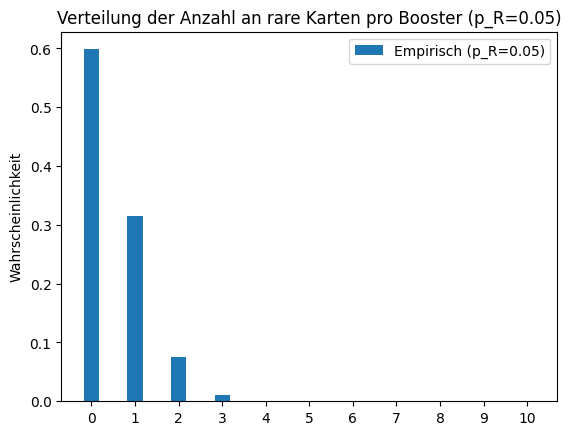

In [73]:

# Balkendiagramm der Raritätenverteilung von 1 bis 10 (auch wenn der Counter nicht alle Zahlen hat)
empirical_values_new = [rarity_counts_new.get(i, 0) / N for i in range(0, b + 1)]
x_new = list(range(0, b + 1))
plt.bar(x_new, empirical_values_new, width, label='Empirisch (p_R=0.05)')
plt.xticks(x_new, x_new)
plt.title('Verteilung der Anzahl an rare Karten pro Booster (p_R=0.05)')
plt.ylabel('Wahrscheinlichkeit')
plt.legend()
plt.show()
